# Mesure du Flux 

- Utilisation de la sonde AXUV100, réglage du gain du phantom sur $10^6$ en mode **Low**
- Synchrotron: 500 Ma
- Mesures effectuées à la main avec le multimètre le 21/03/2023, Page 48 du cahier de Manip1 de Hugo Chauvet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [2]:
%mkdir data
%mkdir figures

mkdir: impossible de créer le répertoire « data »: Le fichier existe
mkdir: impossible de créer le répertoire « figures »: Le fichier existe


## Numérisation des données

In [3]:
GainPhantom = 1e-6
W = list(range(175, 220, 5)) + list(range(220, 420+10, 10)) + [450, 500, 550, 600]
V = [0.001, 0.001, 0.001, 0.003, 0.019, 0.064, 0.110, 0.132, 0.152, 0.185, 0.311, 0.475, 0.671, 0.846, 0.976, 1.002, 0.896, 0.639, 0.495, 0.419, 0.375, 0.349, 0.333, 0.351,
     0.366, 0.272, 0.180, 0.139, 0.109, 0.089, 0.055, 0.037, 0.021, 0.009]

data = p.DataFrame({'W (nm)': W, 'V (V)': V})
data.to_csv('./data/data_diode_polypheme_21032023.csv')
data.head()

W (nm)  V (V)
0     175  0.001
1     180  0.001
2     185  0.001
3     190  0.003
4     195  0.019

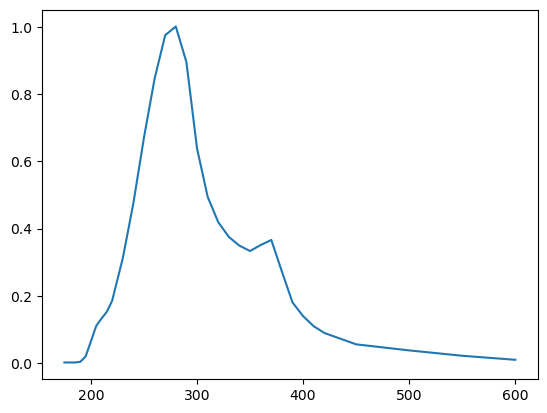

In [52]:
plt.plot(data['W (nm)'], data['V (V)'])

## Chargement des courbes de calibration de la diode

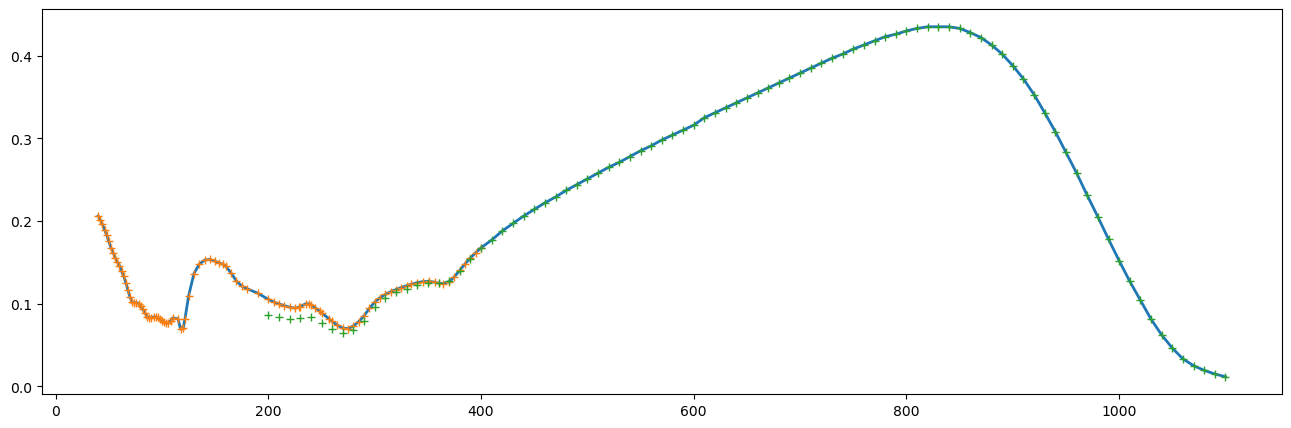

In [4]:
calibUV = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_40-400nm.csv', skiprows=4, names=('W (nm)', 'R (A/W)'))
calibVIS = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_200-1100nm.csv', skiprows=4, names=('W (nm)', 'reflectance', 'R (A/W)', 'External QR', 'Internal QE'))

# On met ensemble les deux séries on prend calibUV puis à la fin on enchaine sur calibVIS
calibMerged = p.concat((calibUV, calibVIS[calibVIS['W (nm)'] > calibUV['W (nm)'].max()]))

# Plot pour voir 
plt.figure(figsize=(16,5))
plt.plot(calibMerged['W (nm)'], calibMerged['R (A/W)'], '-', lw=2)
plt.plot(calibUV['W (nm)'], calibUV['R (A/W)'], '+')
plt.plot(calibVIS['W (nm)'], calibVIS['R (A/W)'], '+')

## Convertion des données pour avoir l'intensité, la puissance et le Flux

- Le flux de photons $\phi$ unité $\frac{photons}{s\, m^2}$ soit des photons par second métres carrés
$$ H = \phi \times \frac{hc}{\lambda}$$
Avec $H$ la puissance par mètre carré $[W/m^2]$, $h$ la constant de Plank, $c$ la célérité de la lumière, et $\lambda$ la longueur d'onde

In [5]:
# Pour avoir le courant I en ampère
data['I (A)'] = data['V (V)'] * GainPhantom

# Pour avoir la puissance (on utilise la calibration que l'on interpole lineairement au bonnes longueus d'ondes)
calib = np.interp(data['W (nm)'], calibMerged['W (nm)'], calibMerged['R (A/W)'])
data['P (W)'] = data['I (A)'] / calib

h = 6.62e-34
c = 2.99e8
data['Flux'] = ( data['P (W)'] * data['W (nm)'] * 10e-9 ) / (c*h)

data.to_csv('./data/data_flux_polypheme_21032023.csv')
data

W (nm)  V (V)         I (A)         P (W)          Flux
0      175  0.001  1.000000e-09  8.250825e-09  7.294680e+10
1      180  0.001  1.000000e-09  8.467401e-09  7.700048e+10
2      185  0.001  1.000000e-09  8.669267e-09  8.102610e+10
3      190  0.003  3.000000e-09  2.664298e-08  2.557451e+11
4      195  0.019  1.900000e-08  1.744720e-07  1.718823e+12
5      200  0.064  6.400000e-08  6.083650e-07  6.147026e+12
6      205  0.110  1.100000e-07  1.078431e-06  1.116907e+13
7      210  0.132  1.320000e-07  1.323972e-06  1.404652e+13
8      215  0.152  1.520000e-07  1.558974e-06  1.693356e+13
9      220  0.185  1.850000e-07  1.933124e-06  2.148589e+13
10     230  0.311  3.110000e-07  3.226141e-06  3.748711e+13
11     240  0.475  4.750000e-07  4.812563e-06  5.835237e+13
12     250  0.671  6.710000e-07  7.547807e-06  9.533044e+13
13     260  0.846  8.460000e-07  1.076336e-05  1.413813e+14
14     270  0.976  9.760000e-07  1.390313e-05  1.896476e+14
15     280  1.002  1.002000e-06  1.370725e-05  1.939006e+14
16     290  0.896  8.960000e-07  1.049180e-05  1.537160e+14
17     300  0.639  6.390000e-07  6.277014e-06  9.513606e+13
18     310  0.495  4.950000e-07  4.451439e-06  6.971607e+13
19     320  0.419  4.190000e-07  3.578138e-06  5.784661e+13
20     330  0.375  3.750000e-07  3.081348e-06  5.137188e+13
21     340  0.349  3.490000e-07  2.783094e-06  4.780547e+13
22     350  0.333  3.330000e-07  2.623062e-06  4.638178e+13
23     360  0.351  3.510000e-07  2.812500e-06  5.115238e+13
24     370  0.366  3.660000e-07  2.888713e-06  5.399792e+13
25     380  0.272  2.720000e-07  1.935943e-06  3.716610e+13
26     390  0.180  1.800000e-07  1.159047e-06  2.283686e+13
27     400  0.139  1.390000e-07  8.293556e-07  1.675991e+13
28     410  0.109  1.090000e-07  6.158192e-07  1.275581e+13
29     420  0.089  8.900000e-08  4.734043e-07  1.004505e+13
30     450  0.055  5.500000e-08  2.570093e-07  5.842951e+12
31     500  0.037  3.700000e-08  1.474104e-07  3.723650e+12
32     550  0.021  2.100000e-08  7.368421e-08  2.047425e+12
33     600  0.009  9.000000e-09  2.848101e-08  8.633313e+11

In [6]:
x = np.linspace(data['W (nm)'].min(), data['W (nm)'].max(), 200)
fit = np.interp(x, data['W (nm)'], data['Flux'])

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(data['W (nm)'], data['P (W)']*1e6, '-', lw=2)
plt.plot(data['W (nm)'], data['P (W)']*1e6, 'o', ms=7)
plt.grid()
plt.ylabel('Power [µw/(m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Power (linear)')

plt.subplot(132)
plt.plot(x, fit, lw=2)
plt.plot(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (linear)')

plt.subplot(133)
plt.semilogy(x, fit, lw=2)
plt.semilogy(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (semilogy)')

plt.suptitle('Flux at the entrance of Polypheme')
plt.tight_layout()

plt.savefig('./figures/Flux_Polypheme_21032023.pdf')
plt.savefig('./figures/Flux_Polypheme_21032023.png')